<a href="https://colab.research.google.com/github/AiswaryaNandakumar/first_streamlit_app/blob/master/Dissertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Data

In [1]:
import pandas as pd
import numpy as np

prd_data = pd.read_csv("/content/drive/MyDrive/Data/product_info.csv")

In [2]:
prd_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

This leads us to the conclusion that there are 8,494 rows and 27 columns in the products dataset. The dataframe has missing data and has a variety of data types in its columns.


In [3]:
r1 = pd.read_csv("/content/drive/MyDrive/Data/reviews_0-250.csv")
r2 = pd.read_csv("/content/drive/MyDrive/Data/reviews_250-500.csv")
r3 = pd.read_csv("/content/drive/MyDrive/Data/reviews_500-750.csv")
r4 = pd.read_csv("/content/drive/MyDrive/Data/reviews_750-1250.csv")
r5 = pd.read_csv("/content/drive/MyDrive/Data/reviews_1250-end.csv")

r_data = pd.concat([r1, r2, r3, r4, r5])
r_data.info()

<ipython-input-3-9768f02dfb60>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  r1 = pd.read_csv("/content/drive/MyDrive/Data/reviews_0-250.csv")
<ipython-input-3-9768f02dfb60>:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  r4 = pd.read_csv("/content/drive/MyDrive/Data/reviews_750-1250.csv")
<ipython-input-3-9768f02dfb60>:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  r5 = pd.read_csv("/content/drive/MyDrive/Data/reviews_1250-end.csv")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094411 entries, 0 to 49976
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1094411 non-null  int64  
 1   author_id                 1094411 non-null  object 
 2   rating                    1094411 non-null  int64  
 3   is_recommended            926423 non-null   float64
 4   helpfulness               532819 non-null   float64
 5   total_feedback_count      1094411 non-null  int64  
 6   total_neg_feedback_count  1094411 non-null  int64  
 7   total_pos_feedback_count  1094411 non-null  int64  
 8   submission_time           1094411 non-null  object 
 9   review_text               1092967 non-null  object 
 10  review_title              783757 non-null   object 
 11  skin_tone                 923872 non-null   object 
 12  eye_color                 884783 non-null   object 
 13  skin_type                 982

In [4]:
num_cols = prd_data.select_dtypes(include = ['number']).columns
print(num_cols)
print(f'{len(num_cols)} Numeric Columns in Products Dataset')

Index(['brand_id', 'loves_count', 'rating', 'reviews', 'price_usd',
       'value_price_usd', 'sale_price_usd', 'limited_edition', 'new',
       'online_only', 'out_of_stock', 'sephora_exclusive', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')
15 Numeric Columns in Products Dataset


In [5]:
num_cols_reviews = r_data.select_dtypes(include = ['number']).columns
print(num_cols_reviews)
print(f'{len(num_cols_reviews)} Numeric Columns in Reviews Dataset')

Index(['Unnamed: 0', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'price_usd'],
      dtype='object')
8 Numeric Columns in Reviews Dataset


In [6]:
non_num_cols = prd_data.select_dtypes(exclude=['number']).columns
print(non_num_cols)
print(f'{len(non_num_cols)} Non-Numeric Columns in Products Dataset')

Index(['product_id', 'product_name', 'brand_name', 'size', 'variation_type',
       'variation_value', 'variation_desc', 'ingredients', 'highlights',
       'primary_category', 'secondary_category', 'tertiary_category'],
      dtype='object')
12 Non-Numeric Columns in Products Dataset


In [7]:
non_num_cols_reviews = r_data.select_dtypes(exclude=['number']).columns
print(non_num_cols_reviews)
print(f'{len(non_num_cols_reviews)} Non-Numeric Columns in Reviews Dataset')

Index(['author_id', 'submission_time', 'review_text', 'review_title',
       'skin_tone', 'eye_color', 'skin_type', 'hair_color', 'product_id',
       'product_name', 'brand_name'],
      dtype='object')
11 Non-Numeric Columns in Reviews Dataset


# Data Cleaning



Missing *Data*

In [8]:
missing_prd_data = prd_data.isna().sum()
missing_prd_data

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
variation_desc        7244
ingredients            945
price_usd                0
value_price_usd       8043
sale_price_usd        8224
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
child_max_price       5740
child_min_price       5740
dtype: int64

In [9]:
missing_prd_data_percent = prd_data.isna().mean()
missing_prd_data_percent

product_id            0.000000
product_name          0.000000
brand_id              0.000000
brand_name            0.000000
loves_count           0.000000
rating                0.032729
reviews               0.032729
size                  0.192018
variation_type        0.170002
variation_value       0.188133
variation_desc        0.852837
ingredients           0.111255
price_usd             0.000000
value_price_usd       0.946904
sale_price_usd        0.968213
limited_edition       0.000000
new                   0.000000
online_only           0.000000
out_of_stock          0.000000
sephora_exclusive     0.000000
highlights            0.259830
primary_category      0.000000
secondary_category    0.000942
tertiary_category     0.116553
child_count           0.000000
child_max_price       0.675771
child_min_price       0.675771
dtype: float64

In [10]:
missing_reviews_data = r_data.isna().sum()
missing_reviews_data

Unnamed: 0                       0
author_id                        0
rating                           0
is_recommended              167988
helpfulness                 561592
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                   1444
review_title                310654
skin_tone                   170539
eye_color                   209628
skin_type                   111557
hair_color                  226768
product_id                       0
product_name                     0
brand_name                       0
price_usd                        0
dtype: int64

In [11]:
missing_reviews_data_percent = r_data.isna().mean()
missing_reviews_data_percent

Unnamed: 0                  0.000000
author_id                   0.000000
rating                      0.000000
is_recommended              0.153496
helpfulness                 0.513145
total_feedback_count        0.000000
total_neg_feedback_count    0.000000
total_pos_feedback_count    0.000000
submission_time             0.000000
review_text                 0.001319
review_title                0.283855
skin_tone                   0.155827
eye_color                   0.191544
skin_type                   0.101933
hair_color                  0.207206
product_id                  0.000000
product_name                0.000000
brand_name                  0.000000
price_usd                   0.000000
dtype: float64

### Outliers

In [12]:
prd_data.kurt(numeric_only=True)

brand_id               1.093603
loves_count           81.970717
rating                 4.325185
reviews               92.016227
price_usd            175.725678
value_price_usd       11.359239
sale_price_usd        86.270657
limited_edition        9.309590
new                    9.030711
online_only           -0.154605
out_of_stock           8.654053
sephora_exclusive     -1.032784
child_count           59.022650
child_max_price       18.646198
child_min_price       17.375622
dtype: float64

Compared to the other numerical columns, the price_usd column—which shows the pricing in U.S. dollars inside the Products dataset—has a noticeably greater kurtosis value. To look for an outlier on the left or right side of the distribution, utilise Python's describe() function.


In [13]:
prd_data['price_usd'].describe()

count    8494.000000
mean       51.655595
std        53.669234
min         3.000000
25%        25.000000
50%        35.000000
75%        58.000000
max      1900.000000
Name: price_usd, dtype: float64

Here, the max value is at 1,900 USD, while half of the data lies between 25 USD and 58 USD.

In [14]:
prd_data.loc[prd_data['price_usd']==1900]

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
6802,P502216,Shani Darden by Déesse PRO LED Light Mask,6314,Shani Darden Skin Care,4154,3.75,4.0,NaN,NaN,NaN,...,1,0,1,"['Good for: Loss of firmness', 'Good for: Anti...",Skincare,High Tech Tools,Anti-Aging,0,NaN,NaN


In [15]:
r_data.kurt(numeric_only=True)

Unnamed: 0                     -0.636248
rating                          1.783414
is_recommended                  1.439056
helpfulness                     0.623455
total_feedback_count         9782.757445
total_neg_feedback_count     5634.817793
total_pos_feedback_count    12540.344131
price_usd                      39.158158
dtype: float64

The columns related to the feedback counts have a high likelihood of outliers.

### Unnecessary Data

In [16]:
  num_rows = len(prd_data)

  for col in prd_data.columns:
      counts=prd_data[col].value_counts(dropna=False)
      top_pct=(counts/num_rows).iloc[0]

      if top_pct > 0.50:
          print('{0}:{1:2f}%'.format(col,top_pct*100))
          print(counts)
          print()

variation_desc:85.283730%
NaN                       7244
black                       46
clear                       14
nude pink                   10
pink                         8
                          ... 
Vivid Fuchsia                1
pewter                       1
warm scarlet                 1
light medium to medium       1
cherry red                   1
Name: variation_desc, Length: 936, dtype: int64

value_price_usd:94.690370%
NaN      8043
40.0       15
48.0       12
45.0       10
36.0        9
         ... 
234.0       1
252.0       1
127.0       1
233.0       1
199.0       1
Name: value_price_usd, Length: 175, dtype: int64

sale_price_usd:96.821286%
NaN      8224
7.00       21
25.00      15
8.00       14
6.00       13
         ... 
56.25       1
39.50       1
33.60       1
13.50       1
27.30       1
Name: sale_price_usd, Length: 89, dtype: int64

limited_edition:92.971509%
0    7897
1     597
Name: limited_edition, dtype: int64

new:92.830233%
0    7885
1     609
Name: 

The columns mentioned with are more than 50% of the same value from the Products dataset.

NaN value_price_usd - 94.69% variation_desc - 85.28% NaN selling price in USD is 96.82%. NaN
Since the majority of the values in these three columns are NaN, the dataframe will remove them.

boolean new, boolean limited edition, boolean online only, boolean out of stock, boolean sephora exclusive, and boolean
Since each of these columns has a boolean data type (True/False), redundancy will not apply to them. These columns, however, offer no insight into our business tasks, and as a result, they will be removed from the dataframe due to their lack of relevance.

child_count - 0 (67.57%)
67.57% is child_max_price. NaN
67.57% is child_min_price. NaN

The child_max_price and child_min_price columns are primarily NaNs and are not relevant to this project; the child_count column is repetitious in nature. removing them from the final Products dataframe as a result.


In [17]:
new_data = prd_data.drop(columns=['variation_desc','value_price_usd','sale_price_usd','limited_edition','new','online_only','out_of_stock','sephora_exclusive','child_count','child_max_price','child_min_price'],axis=1)

# while we're at it, we can remove the outlier we discovered earlier

new_data = new_data[new_data.price_usd != 1900]

new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8493 entries, 0 to 8493
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8493 non-null   object 
 1   product_name        8493 non-null   object 
 2   brand_id            8493 non-null   int64  
 3   brand_name          8493 non-null   object 
 4   loves_count         8493 non-null   int64  
 5   rating              8215 non-null   float64
 6   reviews             8215 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  ingredients         7549 non-null   object 
 11  price_usd           8493 non-null   float64
 12  highlights          6286 non-null   object 
 13  primary_category    8493 non-null   object 
 14  secondary_category  8485 non-null   object 
 15  tertiary_category   7503 non-null   object 
dtypes: flo

In [18]:
num_rows_reviews = len(r_data)

for col in r_data.columns:
    counts=r_data[col].value_counts(dropna=False)
    top_pct=(counts/num_rows_reviews).iloc[0]

    if top_pct > 0.50:
        print('{0}:{1:2f}%'.format(col,top_pct*100))
        print(counts)
        print()

rating:63.865495%
5    698951
4    199389
3     81816
1     61223
2     53032
Name: rating, dtype: int64

is_recommended:71.103087%
1.0    778160
NaN    167988
0.0    148263
Name: is_recommended, dtype: int64

helpfulness:51.314543%
NaN         561592
1.000000    251334
0.000000     47741
0.500000     34987
0.666667     24887
             ...  
0.941632         1
0.937583         1
0.890443         1
0.584416         1
0.901316         1
Name: helpfulness, Length: 3768, dtype: int64

total_feedback_count:51.314543%
0       561592
1       130010
2        79048
3        56178
4        42443
         ...  
483          1
1033         1
508          1
579          1
1222         1
Name: total_feedback_count, Length: 676, dtype: int64

total_neg_feedback_count:74.279772%
0       812926
1       148867
2        50382
3        24461
4        13839
         ...  
392          1
126          1
198          1
268          1
1159         1
Name: total_neg_feedback_count, Length: 259, dtype: int64


Due to their relevance, the columns pertaining to feedback counts may be removed. The is_recommended boolean field is irrelevant, and the helpfulness columns are mostly NaN. The user feature columns may be valuable in subsequent analyses, but they will not be relevant for sentiment and text analysis.


In [19]:
new_review_data = r_data.drop(columns=['is_recommended','helpfulness','total_feedback_count','total_neg_feedback_count','total_pos_feedback_count','skin_tone','eye_color','skin_type','hair_color'])
new_review_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094411 entries, 0 to 49976
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1094411 non-null  int64  
 1   author_id        1094411 non-null  object 
 2   rating           1094411 non-null  int64  
 3   submission_time  1094411 non-null  object 
 4   review_text      1092967 non-null  object 
 5   review_title     783757 non-null   object 
 6   product_id       1094411 non-null  object 
 7   product_name     1094411 non-null  object 
 8   brand_name       1094411 non-null  object 
 9   price_usd        1094411 non-null  float64
dtypes: float64(1), int64(2), object(7)
memory usage: 91.8+ MB


# Exploratory Data Analysis

### Product Categories


In [20]:
new_data.primary_category.value_counts()

Skincare           2419
Makeup             2369
Hair               1464
Fragrance          1432
Bath & Body         405
Mini Size           288
Men                  60
Tools & Brushes      52
Gifts                 4
Name: primary_category, dtype: int64

According to the aforementioned results, the items are further filtered by "secondary" and "tertiary" categories after being sorted into nine "primary" categories. Products that come under the skincare category make up a sizable portion of the data, which might be helpful once the sentiment and text analyses of the skincare reviews dataset are finished.


In [21]:
new_data.secondary_category.value_counts()

Women                        875
Hair Styling & Treatments    757
Eye                          711
Face                         659
Moisturizers                 551
Value & Gift Sets            498
Treatments                   466
Shampoo & Conditioner        431
Lip                          411
Cleansers                    361
Candles & Home Scents        263
Brushes & Applicators        246
Body Moisturizers            220
Mini Size                    187
Eye Care                     186
Masks                        166
Cheek                        165
Tools                        153
Makeup                       137
Men                          135
Sunscreen                    109
Skincare                      98
Bath & Shower                 84
Wellness                      79
High Tech Tools               79
Body Care                     69
Self Tanners                  64
Lip Balms & Treatments        61
Hair                          59
Nail                          52
Accessorie

Results for the secondary categories reveal a longer list than for the core categories—41 categories as opposed to the initial 9.


In [22]:
new_data.tertiary_category.value_counts()

Perfume                      568
Moisturizers                 386
Face Serums                  379
Rollerballs & Travel Size    287
Hair Styling Products        255
                            ... 
Under-Eye Concealer            3
Sunscreen                      2
Hair Thinning & Hair Loss      2
Damaged Hair                   1
Manicure & Pedicure Tools      1
Name: tertiary_category, Length: 118, dtype: int64

As expected, the length of distinct categories drastically increases with 118 under tertiary.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [24]:
ing = pd.DataFrame(new_data, columns=['product_id','product_name','brand_name','ingredients','price_usd'])

In [25]:
ing = ing[ing['ingredients'].str.split(':').str.len()<2]

In [26]:
ing = ing.dropna()
ing = ing.reset_index(drop=True)
ing.shape

(6067, 5)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# extracting the values from the ingredients column as our corpus
texts = ing.ingredients.values

tfidf = TfidfVectorizer().fit_transform(texts)

# vectorizer automatically returns a normalized tf-idf

pairwise_similarity = tfidf * tfidf.T

In [28]:
pairwise_similarity

<6067x6067 sparse matrix of type '<class 'numpy.float64'>'
	with 34447455 stored elements in Compressed Sparse Row format>

In [29]:
pairwise_similarity.toarray()

array([[1.        , 0.75621829, 0.79743427, ..., 0.30087318, 0.30895224,
        0.01368228],
       [0.75621829, 1.        , 0.94831426, ..., 0.33599207, 0.27552668,
        0.01573018],
       [0.79743427, 0.94831426, 1.        , ..., 0.29909481, 0.29054365,
        0.01658751],
       ...,
       [0.30087318, 0.33599207, 0.29909481, ..., 1.        , 0.71552857,
        0.1343948 ],
       [0.30895224, 0.27552668, 0.29054365, ..., 0.71552857, 1.        ,
        0.09915311],
       [0.01368228, 0.01573018, 0.01658751, ..., 0.1343948 , 0.09915311,
        1.        ]])

In [30]:
arr = pairwise_similarity.toarray()
np.fill_diagonal(arr, np.nan)
arr

array([[       nan, 0.75621829, 0.79743427, ..., 0.30087318, 0.30895224,
        0.01368228],
       [0.75621829,        nan, 0.94831426, ..., 0.33599207, 0.27552668,
        0.01573018],
       [0.79743427, 0.94831426,        nan, ..., 0.29909481, 0.29054365,
        0.01658751],
       ...,
       [0.30087318, 0.33599207, 0.29909481, ...,        nan, 0.71552857,
        0.1343948 ],
       [0.30895224, 0.27552668, 0.29054365, ..., 0.71552857,        nan,
        0.09915311],
       [0.01368228, 0.01573018, 0.01658751, ..., 0.1343948 , 0.09915311,
               nan]])

In [31]:
maxes = np.nanargmax(arr, axis=0)

maxes.shape

(6067,)

In [32]:
ast = pd.DataFrame(maxes)
ast.shape

(6067, 1)

In [33]:
ing['most_sim_index'] = ast
ing.head()

,product_id,product_name,brand_name,ingredients,price_usd,most_sim_index
0,P473668,La Habana Eau de Parfum,19-69,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,6
1,P473662,Rainbow Bar Eau de Parfum,19-69,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,9
2,P473660,Kasbah Eau de Parfum,19-69,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,4
3,P473658,Purple Haze Eau de Parfum,19-69,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,5
4,P473661,Kasbah Eau de Parfum Travel Spray,19-69,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",30.0,2


from matplotlib import pyplot as plt
_df_0['price_usd'].plot(kind='hist', bins=20, title='price_usd')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['most_sim_index'].plot(kind='hist', bins=20, title='most_sim_index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('product_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('product_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('ingredients').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='price_usd', y='most_sim_index', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['price_usd'].plot(kind='line', figsize=(8, 4), title='price_usd')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['most_sim_index'].plot(kind='line', figsize=(8, 4), title='most_sim_index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['product_name'].value_counts()
    for x_label, grp in _df_8.groupby('product_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('product_id')
_ = plt.ylabel('product_name')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['ingredients'].value_counts()
    for x_label, grp in _df_9.groupby('product_name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('product_name')
_ = plt.ylabel('ingredients')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['product_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='price_usd', y='product_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['product_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='price_usd', y='product_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['ingredients'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='price_usd', y='ingredients', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['product_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='most_sim_index', y='product_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [34]:
products = ing.product_name.values

idxes = ing['most_sim_index']

ing['most_sim_product'] = products[idxes]
ing.head()

,product_id,product_name,brand_name,ingredients,price_usd,most_sim_index,most_sim_product
0,P473668,La Habana Eau de Parfum,19-69,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,6,Invisible Post Eau de Parfum
1,P473662,Rainbow Bar Eau de Parfum,19-69,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,9,Rainbow Bar Eau de Parfum Travel Spray
2,P473660,Kasbah Eau de Parfum,19-69,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,4,Kasbah Eau de Parfum Travel Spray
3,P473658,Purple Haze Eau de Parfum,19-69,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,5,Purple Haze Eau de Parfum Travel Spray
4,P473661,Kasbah Eau de Parfum Travel Spray,19-69,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",30.0,2,Kasbah Eau de Parfum


from matplotlib import pyplot as plt
_df_14['price_usd'].plot(kind='hist', bins=20, title='price_usd')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['most_sim_index'].plot(kind='hist', bins=20, title='most_sim_index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_16.groupby('product_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_17.groupby('product_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_18.groupby('ingredients').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_19.groupby('most_sim_product').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='price_usd', y='most_sim_index', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21['price_usd'].plot(kind='line', figsize=(8, 4), title='price_usd')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_22['most_sim_index'].plot(kind='line', figsize=(8, 4), title='most_sim_index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['product_name'].value_counts()
    for x_label, grp in _df_23.groupby('product_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('product_id')
_ = plt.ylabel('product_name')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['ingredients'].value_counts()
    for x_label, grp in _df_24.groupby('product_name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('product_name')
_ = plt.ylabel('ingredients')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['most_sim_product'].value_counts()
    for x_label, grp in _df_25.groupby('ingredients')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('ingredients')
_ = plt.ylabel('most_sim_product')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['product_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='price_usd', y='product_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['product_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='price_usd', y='product_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_28['ingredients'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_28, x='price_usd', y='ingredients', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_29['most_sim_product'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_29, x='price_usd', y='most_sim_product', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [36]:
ing2 = ing.drop('most_sim_index', axis=1)
ing2 = ing2.drop('most_sim_product', axis=1)
ing2 = ing2[~ing2['product_name'].str.contains('Travel')]
ing2 = ing2[~ing2['product_name'].str.contains('travel')]
ing2.shape

(5833, 5)

In [37]:
ing2 = ing2.reset_index(drop=True)

from sklearn.feature_extraction.text import TfidfVectorizer

texts2 = ing2.ingredients.values
tfidf2 = TfidfVectorizer().fit_transform(texts2)

pairwise_similarity2 = tfidf2 * tfidf2.T
pairwise_similarity2.toarray()

arr2 = pairwise_similarity2.toarray()
np.fill_diagonal(arr2, np.nan)

maxes2 = np.nanargmax(arr2, axis=0)

ast2 = pd.DataFrame(maxes2)

ing2['most_sim_index'] = ast2

products2 = ing2.product_name.values
idxes2 = ing2['most_sim_index']

ing2['most_sim_product'] = products2[idxes2]
ing2.head()

,product_id,product_name,brand_name,ingredients,price_usd,most_sim_index,most_sim_product
0,P473668,La Habana Eau de Parfum,19-69,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,4,Invisible Post Eau de Parfum
1,P473662,Rainbow Bar Eau de Parfum,19-69,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,2,Kasbah Eau de Parfum
2,P473660,Kasbah Eau de Parfum,19-69,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,1,Rainbow Bar Eau de Parfum
3,P473658,Purple Haze Eau de Parfum,19-69,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,2,Kasbah Eau de Parfum
4,P473666,Invisible Post Eau de Parfum,19-69,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,La Habana Eau de Parfum


from matplotlib import pyplot as plt
_df_30['most_sim_index'].plot(kind='hist', bins=20, title='most_sim_index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_31.groupby('product_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_32.groupby('product_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_33.groupby('ingredients').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_34.groupby('most_sim_product').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['price_usd']
  ys = series['most_sim_index']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_35.sort_values('price_usd', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('product_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='product_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('price_usd')
_ = plt.ylabel('most_sim_index')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['price_usd']
  ys = series['most_sim_index']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_36.sort_values('price_usd', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('product_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='product_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('price_usd')
_ = plt.ylabel('most_sim_index')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['price_usd']
  ys = series['most_sim_index']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_37.sort_values('price_usd', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ingredients')):
  _plot_series(series, series_name, i)
  fig.legend(title='ingredients', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('price_usd')
_ = plt.ylabel('most_sim_index')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['price_usd']
  ys = series['most_sim_index']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_38.sort_values('price_usd', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('most_sim_product')):
  _plot_series(series, series_name, i)
  fig.legend(title='most_sim_product', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('price_usd')
_ = plt.ylabel('most_sim_index')

from matplotlib import pyplot as plt
_df_39['most_sim_index'].plot(kind='line', figsize=(8, 4), title='most_sim_index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['product_name'].value_counts()
    for x_label, grp in _df_40.groupby('product_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('product_id')
_ = plt.ylabel('product_name')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['ingredients'].value_counts()
    for x_label, grp in _df_41.groupby('product_name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('product_name')
_ = plt.ylabel('ingredients')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['most_sim_product'].value_counts()
    for x_label, grp in _df_42.groupby('ingredients')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('ingredients')
_ = plt.ylabel('most_sim_product')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_43['product_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_43, x='most_sim_index', y='product_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_44['product_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_44, x='most_sim_index', y='product_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_45['ingredients'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_45, x='most_sim_index', y='ingredients', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_46['most_sim_product'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_46, x='most_sim_index', y='most_sim_product', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [38]:
prices = ing2.price_usd.values
brands = ing2.brand_name.values

ing2['price_sim'] = prices[idxes2]
ing2['brand_sim'] = brands[idxes2]

ing2.head(15)

,product_id,product_name,brand_name,ingredients,price_usd,most_sim_index,most_sim_product,price_sim,brand_sim
0,P473668,La Habana Eau de Parfum,19-69,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,4,Invisible Post Eau de Parfum,195.0,19-69
1,P473662,Rainbow Bar Eau de Parfum,19-69,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,2,Kasbah Eau de Parfum,195.0,19-69
2,P473660,Kasbah Eau de Parfum,19-69,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,1,Rainbow Bar Eau de Parfum,195.0,19-69
3,P473658,Purple Haze Eau de Parfum,19-69,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,2,Kasbah Eau de Parfum,195.0,19-69
4,P473666,Invisible Post Eau de Parfum,19-69,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,La Habana Eau de Parfum,195.0,19-69
5,P472300,Capri Eau de Parfum,19-69,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,6,L'air Barbes Eau de Parfum,195.0,19-69
6,P473664,L'air Barbes Eau de Parfum,19-69,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,5,Capri Eau de Parfum,195.0,19-69
7,P476416,AFRICAN Beauty Butter- Intensive Dry Skin Trea...,54 Thrones,"['Butyrospermum Parkii (Shea Nilotica) Butter,...",38.0,8,Mini AFRICAN Beauty Butter- Intensive Dry Skin...,12.0,54 Thrones
8,P503832,Mini AFRICAN Beauty Butter- Intensive Dry Skin...,54 Thrones,"['Butyrospermum Parkii (Shea Nilotica) Butter,...",12.0,7,AFRICAN Beauty Butter- Intensive Dry Skin Trea...,38.0,54 Thrones
9,P483139,The Cape Perfume,ABBOTT,"['Water, Denatured Ethyl Alcohol, Fragrance, (...",84.0,14,Mojave Perfume,84.0,ABBOTT


from matplotlib import pyplot as plt
_df_47['price_usd'].plot(kind='hist', bins=20, title='price_usd')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_48['most_sim_index'].plot(kind='hist', bins=20, title='most_sim_index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_49['price_sim'].plot(kind='hist', bins=20, title='price_sim')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_50.groupby('brand_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_51.groupby('brand_sim').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_52.plot(kind='scatter', x='price_usd', y='most_sim_index', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_53.plot(kind='scatter', x='most_sim_index', y='price_sim', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_54['price_usd'].plot(kind='line', figsize=(8, 4), title='price_usd')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_55['most_sim_index'].plot(kind='line', figsize=(8, 4), title='most_sim_index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_56['price_sim'].plot(kind='line', figsize=(8, 4), title='price_sim')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['brand_sim'].value_counts()
    for x_label, grp in _df_57.groupby('brand_name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('brand_name')
_ = plt.ylabel('brand_sim')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_58['brand_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_58, x='price_usd', y='brand_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_59['brand_sim'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_59, x='price_usd', y='brand_sim', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_60['brand_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_60, x='most_sim_index', y='brand_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_61['brand_sim'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_61, x='most_sim_index', y='brand_sim', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## Sentiment Analysis

In [39]:
new_review_data.head()

,Unnamed: 0,author_id,rating,submission_time,review_text,review_title,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


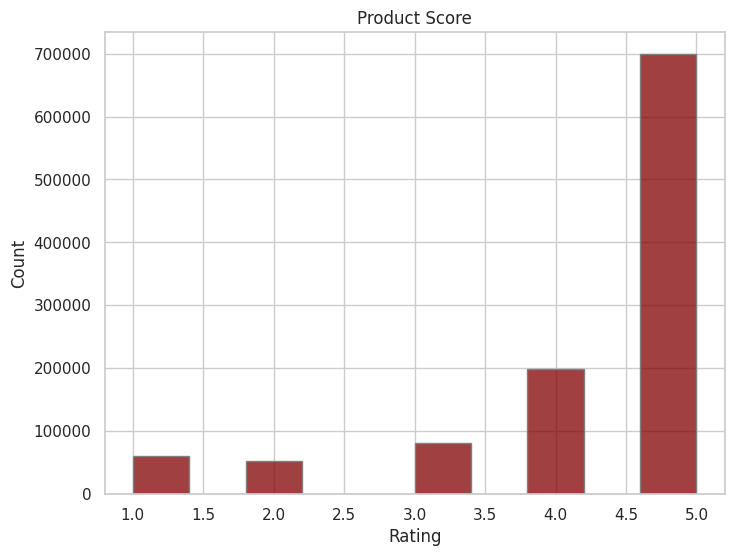

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'new_review_data' is a pandas DataFrame with a 'rating' column
# If not, replace 'new_review_data' and 'rating' with the appropriate variable names

# Using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(new_review_data['rating'], color='maroon', edgecolor='gray', bins=10)
plt.title('Product Score')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


In [43]:
!pip install stopwords
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

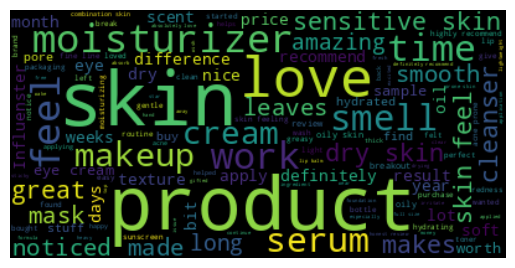

In [44]:
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords

# ensuring that the reviews and titles are in fact string datatypes

new_review_data['review_text'] = new_review_data['review_text'].astype(str)
new_review_data['review_title'] = new_review_data['review_title'].astype(str)

# create stopword list

stopwords = set(stopwords.words())
stopwords.update(['day','night','received','make','week','morning','put','leave'])

# generating a wordcloud and plotting the results

texxt = " ".join(review_title for review_title in new_review_data.review_text)
wordcloud = WordCloud(stopwords=stopwords).generate(texxt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [45]:
textb = new_review_data[new_review_data['rating'] !=3]
textb['sentiment']= textb['rating'].apply(lambda rating: +1 if rating >3 else -1)
textb.head()

<ipython-input-45-cefd0be4077a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Unnamed: 0,author_id,rating,submission_time,review_text,review_title,product_id,product_name,brand_name,price_usd,sentiment
0,0,1741593524,5,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,1
1,1,31423088263,1,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,-1
2,2,5061282401,5,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,1
3,3,6083038851,5,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,1
4,4,47056667835,5,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,1


In [46]:
positive = textb[textb['sentiment']==1]
negative = textb[textb['sentiment']==-1]

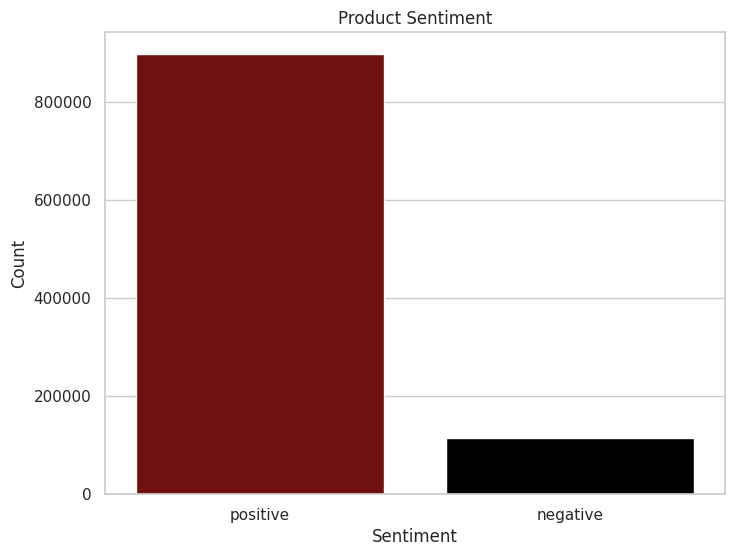

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='sentimentt', data=textb, palette={'positive': 'maroon', 'negative': 'black'})
plt.title('Product Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [49]:
textb['review_text'] = textb['review_text'].astype(str)
textb['review_title'] = textb['review_title'].astype(str)

def remove_punctuation(text):
    final="".join(u for u in text if u not in ("?",".",";",":","!",'"'))
    return final

textb['review_text'] = textb['review_text'].apply(remove_punctuation)
textb=textb.dropna(subset=['review_title'])
textb['review_title']=textb['review_title'].apply(remove_punctuation)

<ipython-input-49-a3e822a99b0e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-49-a3e822a99b0e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-49-a3e822a99b0e>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
new_text = textb[['review_title','sentiment']]
new_text.head()

,review_title,sentiment
0,Taught me how to double cleanse,1
1,Disappointed,-1
2,New Favorite Routine,1
3,Can't go wrong with any of them,1
4,A must have,1


from matplotlib import pyplot as plt
_df_62['sentiment'].plot(kind='hist', bins=20, title='sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_63.groupby('review_title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_64['sentiment'].plot(kind='line', figsize=(8, 4), title='sentiment')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_65['review_title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_65, x='sentiment', y='review_title', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [51]:
import numpy as np

index = textb.index
textb['random_number'] =np.random.randn(len(index))

train=textb[textb['random_number']<=0.8]
test=textb[textb['random_number']>0.8]

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')

train_matrix = vectorizer.fit_transform(train['review_title'])
test_matrix = vectorizer.transform(test['review_title'])

In [53]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [54]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [55]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [56]:
predictions = lr.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix, classification_report
new=np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[ 13360,   2373],
       [ 10640, 187992]])

In [58]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.56      0.85      0.67     15733
           1       0.99      0.95      0.97    198632

    accuracy                           0.94    214365
   macro avg       0.77      0.90      0.82    214365
weighted avg       0.96      0.94      0.94    214365



In [59]:
print(new_data['product_name'].nunique())
print(new_data['brand_name'].nunique())

8414
304


In [60]:
new_data.groupby('brand_name')['loves_count'].sum().nlargest(10)

brand_name
SEPHORA COLLECTION             12530142
Fenty Beauty by Rihanna         9369443
Anastasia Beverly Hills         7941142
Charlotte Tilbury               7725055
The Ordinary                    7449373
NARS                            7442525
Dior                            6230997
Urban Decay                     5730058
Rare Beauty by Selena Gomez     5724687
tarte                           4995414
Name: loves_count, dtype: int64

This suggests that the SEPHORA COLLECTION brand is leading in terms of loves_count.

[[Text(0, 0, ''),
  Text(1, 0, ''),
  Text(2, 0, ''),
  Text(3, 0, ''),
  Text(4, 0, '')]]

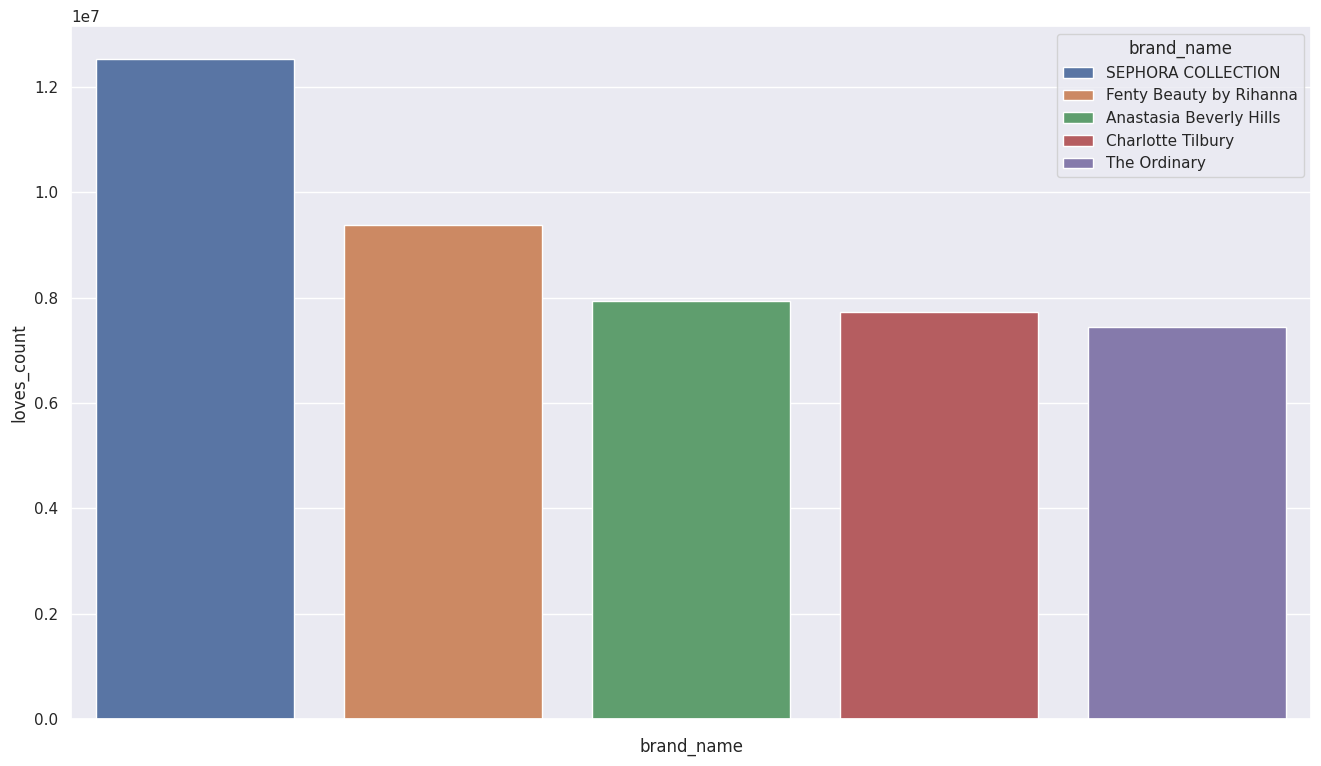

In [61]:
sns.set(rc={'figure.figsize':(16,9)})

k = new_data.groupby('brand_name', as_index=False)['loves_count'].sum().sort_values(by='loves_count', ascending=False).head(5)
sns.barplot(data=k, x='brand_name',y='loves_count',hue='brand_name',dodge=False).set(xticklabels=[])

In [62]:
new_data.groupby('brand_name')['loves_count'].sum().nsmallest(5)

brand_name
The Maker           292
Eight & Bob         394
BERDOUES            985
philosophy         1266
MACRENE actives    1505
Name: loves_count, dtype: int64

Out of the approximately 300 brands available on Sephora, the Maker brand is the least "loved."


[[Text(0, 0, ''),
  Text(1, 0, ''),
  Text(2, 0, ''),
  Text(3, 0, ''),
  Text(4, 0, '')]]

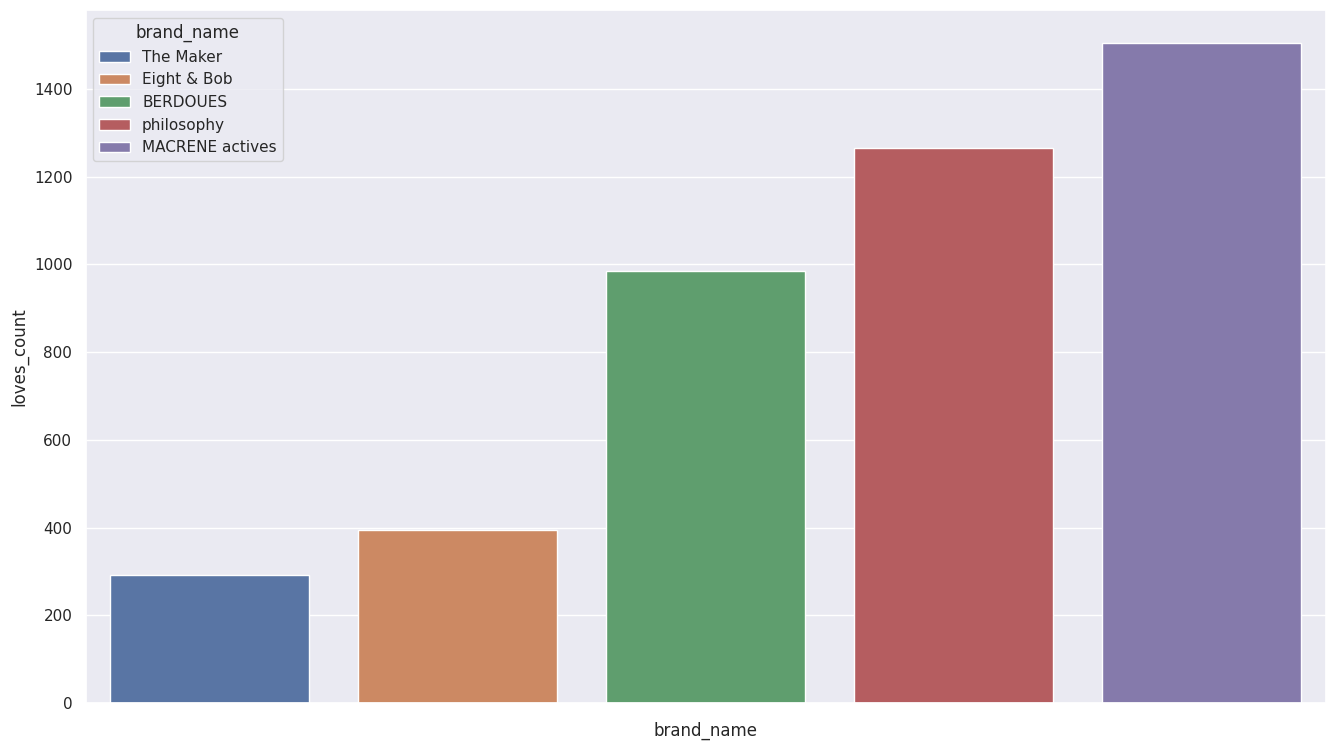

In [63]:
sns.set(rc={'figure.figsize':(16,9)})

k = new_data.groupby('brand_name', as_index=False)['loves_count'].sum().sort_values(by='loves_count', ascending=True).head(5)
sns.barplot(data=k, x='brand_name',y='loves_count',hue='brand_name',dodge=False).set(xticklabels=[])

# Product Recommendation System

In [64]:
merged_data = pd.merge(new_review_data, new_data, on='product_id', how='left')

# Extract relevant columns for product recommendation
product_recommendation_data = merged_data[['product_id', 'product_name_x', 'review_text']]

# Drop duplicates to avoid redundant calculations
product_recommendation_data = product_recommendation_data.drop_duplicates(subset=['product_id', 'review_text'])

# Get the indices of products in the DataFrame
product_indices = product_recommendation_data['product_id'].values


In [65]:
merged_data.tail()

,Unnamed: 0,author_id,rating_x,submission_time,review_text,review_title,product_id,product_name_x,brand_name_x,price_usd_x,...,reviews,size,variation_type,variation_value,ingredients,price_usd_y,highlights,primary_category,secondary_category,tertiary_category
1094406,49972,2276253200,5,2023-03-13,Consider salicylic acid your secret weapon for...,nan,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0,...,1.0,1.7 oz / 50 mL,Size,1.7 oz / 50 mL,"['Aqua/Water/Eau, Propanediol, Isononyl Isonon...",49.0,"['Good for: Dullness/Uneven Texture', 'Good fo...",Skincare,Treatments,Blemish & Acne Treatments
1094407,49973,28013163278,5,2023-03-13,I’ve been using this as my only moisturizer fo...,nan,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0,...,1.0,1.7 oz / 50 mL,Size,1.7 oz / 50 mL,"['Aqua/Water/Eau, Propanediol, Isononyl Isonon...",49.0,"['Good for: Dullness/Uneven Texture', 'Good fo...",Skincare,Treatments,Blemish & Acne Treatments
1094408,49974,1539813076,5,2023-03-13,I got breakouts whenever it’s my time of month...,nan,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0,...,1.0,1.7 oz / 50 mL,Size,1.7 oz / 50 mL,"['Aqua/Water/Eau, Propanediol, Isononyl Isonon...",49.0,"['Good for: Dullness/Uneven Texture', 'Good fo...",Skincare,Treatments,Blemish & Acne Treatments
1094409,49975,5595682861,5,2023-03-13,I love this!!! I don’t get actual acne just an...,nan,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0,...,1.0,1.7 oz / 50 mL,Size,1.7 oz / 50 mL,"['Aqua/Water/Eau, Propanediol, Isononyl Isonon...",49.0,"['Good for: Dullness/Uneven Texture', 'Good fo...",Skincare,Treatments,Blemish & Acne Treatments
1094410,49976,27666075558,5,2023-03-13,I have never tried anything from StriVectin bu...,Amazing Product,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0,...,1.0,1.7 oz / 50 mL,Size,1.7 oz / 50 mL,"['Aqua/Water/Eau, Propanediol, Isononyl Isonon...",49.0,"['Good for: Dullness/Uneven Texture', 'Good fo...",Skincare,Treatments,Blemish & Acne Treatments


In [66]:
from difflib import get_close_matches
from sklearn.metrics.pairwise import cosine_similarity

In [67]:
def get_recommendations(user_input, product_data=new_data):
    # Find products whose names contain at least one word similar to any word in the user input
    matching_products = product_data[product_data['product_name'].apply(lambda x: any(get_close_matches(word, x.split(), n=1, cutoff=0.8) for word in user_input.split()))]

    if matching_products.empty:
        print(f"No products found for the entered keywords.")
        return

    # Calculate cosine similarity scores for the matching products
    matching_product_names = matching_products['product_name'].tolist()
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(product_recommendation_data['review_text'])
    tfidf_matrix = tfidf_vectorizer.fit_transform([user_input] + matching_product_names)
    cosine_similarities = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:]).flatten()

    # Get the indices of the top 5 similar products
    top_indices = cosine_similarities.argsort()[::-1][:5]

    # Return the product names of the top 5 similar products
    return [matching_product_names[idx] for idx in top_indices]

user_input = input("Enter keywords for product search: ")

# Get recommendations based on user input
recommendations = get_recommendations(user_input)

# Check if recommendations are available
if recommendations:
    print(f"\nTop 5 recommended products for '{user_input}':\n{recommendations}")
else:
    print(f"No recommendations found for '{user_input}'.")


Enter keywords for product search: lip balm

Top 5 recommended products for 'lip balm':
['maracuja juicy lip liner', 'maracuja juicy lip crème', 'tint & plump maracuja juicy lip duo', 'Color Flip Eyeshadow Palette', 'Ceramic Slip French Green Clay Cleanser']
